# Dependencies

In [113]:
# Main imports for analysis and visualization 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Read tripadviser reviews file and get information of the dataset

In [45]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [47]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [48]:
df.shape

(20491, 2)

# Explore the dataset for any trends, patterns, and relationships

In [49]:
# Creating a histogram of the ratings
fig = px.histogram(df, x="Rating", title="Distribution of Ratings", nbins=5, labels={"Rating": "Hotel Ratings"})
fig.show()

# Sentiment analysis

In [50]:
# Use spacy to process reviews into tokens
import spacy
nlp = spacy.load('en_core_web_lg')
type(nlp)

spacy.lang.en.English

In [51]:
# Function to preprocess text
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)


# New column to collect lemma of tokens
df['lemmas'] = df['Review'].apply(preprocess_text) 

In [52]:
df

,Review,Rating,lemmas
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room 4 experience hotel monaco seattle go...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,well keep secret 3rd time stay charm 5 star be...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacation hotel open sept 17 2...


In [66]:
# Function to get sentiment manually based off rating
def manual_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the manual sentiment function
df['Sentiment_Manual'] = df['Rating'].apply(manual_sentiment)


In [59]:
# Using textblob to get sentiment analysis from lemmas
from textblob import TextBlob

# Function to get predicted sentiment 
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a polarity score between -1 and 1 with close to zero being neutral

# Apply sentiment analysis
df['Sentiment Score'] = df['lemmas'].apply(get_sentiment)

# Convert sentiment score to categories
df['Sentiment_Predicted'] = pd.cut(df['Sentiment'], bins=[-1, -0.01, 0.1, 1], labels=["Negative", "Neutral", "Positive"])


In [106]:
df

,Review,Rating,lemmas,Review_Length,Sentiment Score,Sentiment_Predicted,Sentiment_Manual
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,593,0.187495,Positive,Positive
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,1689,0.216252,Positive,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,nice room 4 experience hotel monaco seattle go...,1427,0.335714,Positive,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,600,0.532870,Positive,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,1281,0.442593,Positive,Positive
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,well keep secret 3rd time stay charm 5 star be...,733,0.115349,Positive,Positive
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,306,0.503704,Positive,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff particu...,443,0.212716,Positive,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacation hotel open sept 17 2...,5557,0.128707,Positive,Negative


In [68]:
# Visualization for Predicted Sentiments
fig_pred = px.histogram(df, x='Sentiment_Predicted', color='Sentiment_Predicted',
                        title="Distribution of Predicted Sentiments",
                        labels={'Sentiment_Predicted':'Predicted Sentiment Categories'},
                        category_orders={"Sentiment_Predicted": ["Negative", "Neutral", "Positive"]})
fig_pred.show()

# Visualization for Manual Sentiments
fig_manual = px.histogram(df, x='Sentiment_Manual', color='Sentiment_Manual',
                          title="Distribution of Manual Sentiments Based on Ratings",
                          labels={'Sentiment_Manual':'Manual Sentiment Categories'},
                          category_orders={"Sentiment_Manual": ["Negative", "Neutral", "Positive"]})
fig_manual.show()


# Word Frequency analysis

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top words
def get_top_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Categories and Sentiment Types
categories = ['Positive', 'Neutral', 'Negative']
combined_df = pd.DataFrame()

# Extract and append top words data
for category in categories:
    for sentiment_type in ['Predicted', 'Manual']:
        column_name = f'Sentiment_{sentiment_type}'
        corpus = df[df[column_name] == category]['lemmas']
        top_words = get_top_words(corpus, 10)
        temp_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
        temp_df['Category'] = f'{category} ({sentiment_type})'
        combined_df = pd.concat([combined_df, temp_df])

# Plotting all categories in one graph
fig = px.bar(combined_df, x='Word', y='Frequency', color='Category', title='Top Words by Sentiment Category and Type',
             category_orders={"Category": [f"{c} ({t})" for c in categories for t in ['Predicted', 'Manual']]})
fig.show()


# Prediction Model 1. How accurately can Hugging Face model 'distilbert-base-uncased' predict the review rating?

In [90]:
from transformers import pipeline, AutoTokenizer

# Explicitly specify the model for the sentiment analysis pipeline
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
sentiment_classifier = pipeline('sentiment-analysis', model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Testing the pipeline with an example
example_review = "The room was great, and the staff were friendly."
results = sentiment_classifier(example_review)
print(results)



[{'label': 'POSITIVE', 'score': 0.9998774528503418}]


# Process text for HuggingFace distilbert

In [93]:
def process_texts(classifier, texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        # Directly pass the batch of text to the classifier
        outputs = classifier(batch, truncation=True, padding=True, max_length=512)
        results.extend(outputs)
    return results

# Split data for training and testing

In [95]:
# Split data into training and test sets
train_lemmas, test_lemmas, train_ratings, test_ratings = train_test_split(
    df['lemmas'], df['Rating'], test_size=0.2, random_state=42
)


# Run model test

In [96]:
# Function to map sentiment to ratings
def sentiment_to_rating(sentiment):
    if sentiment['label'] == 'POSITIVE':
        return 5 if sentiment['score'] > 0.85 else 4
    elif sentiment['label'] == 'NEGATIVE':
        return 2 if sentiment['score'] > 0.85 else 1
    else:
        return 3

# Process test lemmas and map to ratings
test_sentiments = process_texts(sentiment_classifier, test_lemmas.tolist())
test_predicted_ratings = [sentiment_to_rating(sent) for sent in test_sentiments]

# Metrics results for model

In [112]:
# Calculate metrics
accuracy = accuracy_score(test_ratings, test_predicted_ratings)
precision = precision_score(test_ratings, test_predicted_ratings, average='macro')
recall = recall_score(test_ratings, test_predicted_ratings, average='macro')
f1 = f1_score(test_ratings, test_predicted_ratings, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Assuming test_ratings and test_predicted_ratings are defined and contain your test labels and model predictions
print(classification_report(test_ratings, test_predicted_ratings, zero_division=0))

Accuracy: 0.4662112710417175
Precision: 0.26672306844438115
Recall: 0.3590385745174373
F1 Score: 0.2519658700010695
              precision    recall  f1-score   support

           1       0.07      0.05      0.06       292
           2       0.26      0.82      0.39       333
           3       0.00      0.00      0.00       432
           4       0.42      0.07      0.12      1252
           5       0.59      0.86      0.70      1790

    accuracy                           0.47      4099
   macro avg       0.27      0.36      0.25      4099
weighted avg       0.41      0.47      0.38      4099



c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Confusion Matrix to visually represent models performance

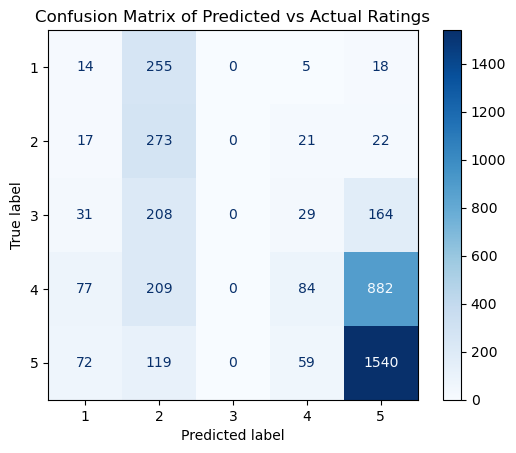

In [115]:
# Generate and display confusion matrix
cm = confusion_matrix(test_ratings, test_predicted_ratings, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Predicted vs Actual Ratings')
plt.show()



Accuracy: 0.4662112710417175 <br>
Precision: 0.26672306844438115 <br>
Recall: 0.3590385745174373 <br>
F1 Score: 0.2519658700010695

# Prediction Model 2. How accurately can 'Naive Bayes' model predict the review ratings? 

In [107]:
# To use naive bayes the data must be converted from textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the lemmas
X = tfidf_vectorizer.fit_transform(df['lemmas'])
y = df['Rating']


# Split data for training and testing

In [109]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

MultinomialNB()

# Run model and get metrics

In [111]:
# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5472066357648206
Precision: 0.4974490101375485
Recall: 0.3609721520705834
F1 Score: 0.3728072086141763
              precision    recall  f1-score   support

           1       0.88      0.34      0.49       292
           2       0.39      0.19      0.26       333
           3       0.21      0.01      0.01       432
           4       0.39      0.35      0.37      1252
           5       0.61      0.91      0.73      1790

    accuracy                           0.55      4099
   macro avg       0.50      0.36      0.37      4099
weighted avg       0.50      0.55      0.49      4099



# Confusion Matrix to visually represent models performance

<Figure size 1000x1000 with 0 Axes>

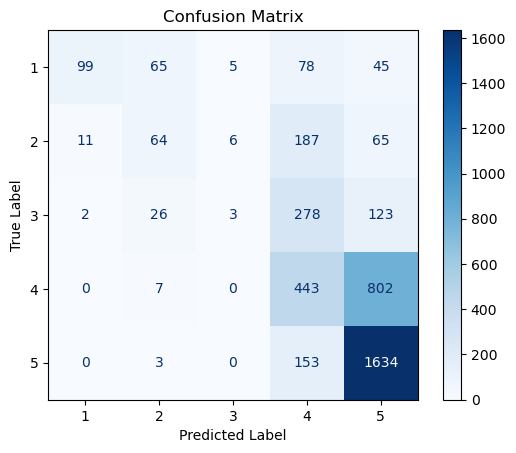

In [114]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.5472066357648206 <br>
Precision: 0.4974490101375485 <br>
Recall: 0.3609721520705834 <br>
F1 Score: 0.3728072086141763 <br>

# Prediction model 3. How accurately can the Linear Support Vector Classification model predict ratings from the review? 

In [117]:
# Import svm model
from sklearn.svm import LinearSVC
# Split data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



LinearSVC(random_state=42)

# Make predictions and evaluate the model

In [118]:
# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")

# Print detailed classification report
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.5959990241522323
SVM Precision: 0.5321553245546007
SVM Recall: 0.5019053754042871
SVM F1 Score: 0.5132449330593766
              precision    recall  f1-score   support

           1       0.69      0.62      0.65       292
           2       0.40      0.36      0.38       333
           3       0.37      0.26      0.31       432
           4       0.51      0.46      0.48      1252
           5       0.69      0.82      0.75      1790

    accuracy                           0.60      4099
   macro avg       0.53      0.50      0.51      4099
weighted avg       0.58      0.60      0.58      4099



# Confusion Matrix to visually represent models performance

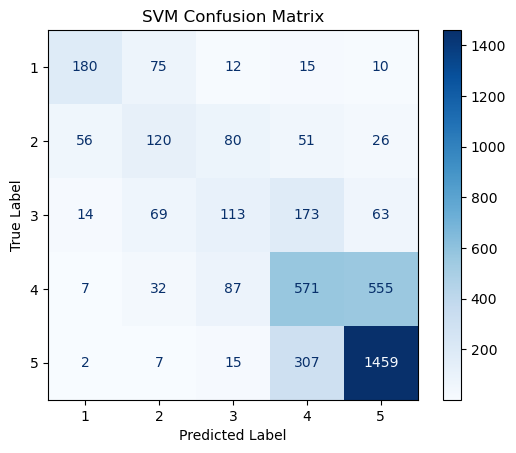

In [119]:
# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_classifier.classes_)

# Display the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

SVM Accuracy: 0.5959990241522323 <br>
SVM Precision: 0.5321553245546007 <br>
SVM Recall: 0.5019053754042871 <br>
SVM F1 Score: 0.5132449330593766